In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os, sys

# Relative paths
dirname = os.path.dirname
sep = os.sep

ml_folder = dirname(os.getcwd())
sys.path.append(ml_folder)

from src.utils import mining_data_tb as md
from src.utils import visualization_tb as vi

import warnings

warnings.filterwarnings("ignore")

In [2]:
examination_dfs = md.read_data(2, "3_examination")
len(examination_dfs)

9

In [3]:
for name, df in examination_dfs.items():
    print(name, df.shape)

dxx_i (5780, 92)
dxx_h (6033, 92)
dxx_j (5114, 92)
bmx_j (8704, 20)
bmx_h (9813, 25)
bmx_i (9544, 25)
bpx_i (9544, 20)
bpx_h (9813, 22)
bpx_j (8704, 20)


I have quite fewer values for the dxx files. Let's check the NaNs before making any decision.

In [4]:
# Filters to pull the variables I need
variable_names = pd.read_csv("../data/6_variables/0_final_variables.csv", index_col = 0)

cond1 = variable_names["file_name"] == "BMX_J"
cond2 = variable_names["file_name"] == "BPX_J"
cond3 = variable_names["file_name"] == "DXX_J"

filter1 = list(variable_names[cond1]["vAr_nAmE"].values)
filter2 = list(variable_names[cond2]["vAr_nAmE"].values)
filter3 = list(variable_names[cond3]["vAr_nAmE"].values)

In [5]:
# Filtering the columns
bmx_h = examination_dfs["bmx_h"].loc[:, filter1]
bmx_i = examination_dfs["bmx_i"].loc[:, filter1]
bmx_j = examination_dfs["bmx_j"].loc[:, filter1]

bpx_h = examination_dfs["bpx_h"].loc[:, filter2]
bpx_i = examination_dfs["bpx_i"].loc[:, filter2]
bpx_j = examination_dfs["bpx_j"].loc[:, filter2]

dxx_h = examination_dfs["dxx_h"].loc[:, filter3]
dxx_i = examination_dfs["dxx_i"].loc[:, filter3]
dxx_j = examination_dfs["dxx_j"].loc[:, filter3]

In [6]:
bmx = pd.concat([bmx_h, bmx_i, bmx_j])
bpx = pd.concat([bpx_h, bpx_i, bpx_j])
dxx = pd.concat([dxx_h, dxx_i, dxx_j])

print(bmx.shape)
print(bmx.info())
print("#" * 50)
print(bpx.shape)
print(bpx.info())
print("#" * 50)
print(dxx.shape)
print(dxx.info())

(28061, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28061 entries, 73557 to 102956
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXARMC   26450 non-null  float64
 1   BMXARML   26454 non-null  float64
 2   BMXBMI    25816 non-null  float64
 3   BMXHT     25852 non-null  float64
 4   BMXWAIST  24575 non-null  float64
 5   BMXWT     27748 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB
None
##################################################
(28061, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28061 entries, 73557 to 102956
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPXDI1  20619 non-null  float64
 1   BPXDI2  21285 non-null  float64
 2   BPXSY1  20619 non-null  float64
 3   BPXSY2  21285 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB
None
##################################################
(16927, 6)
<class 'pandas.

dxx has too many less values. I'll have to drop that data. I'll check the rest too just in case.

In [7]:
bmx.drop(["BMXHEAD", "BMXRECUM"], axis = 1, inplace = True)
bpx.drop(["BPXDI4", "BPXSY4"], axis = 1, inplace = True)

print(bmx.shape)
print(bpx.shape)
print(dxx.shape)

KeyError: "['BMXHEAD' 'BMXRECUM'] not found in axis"

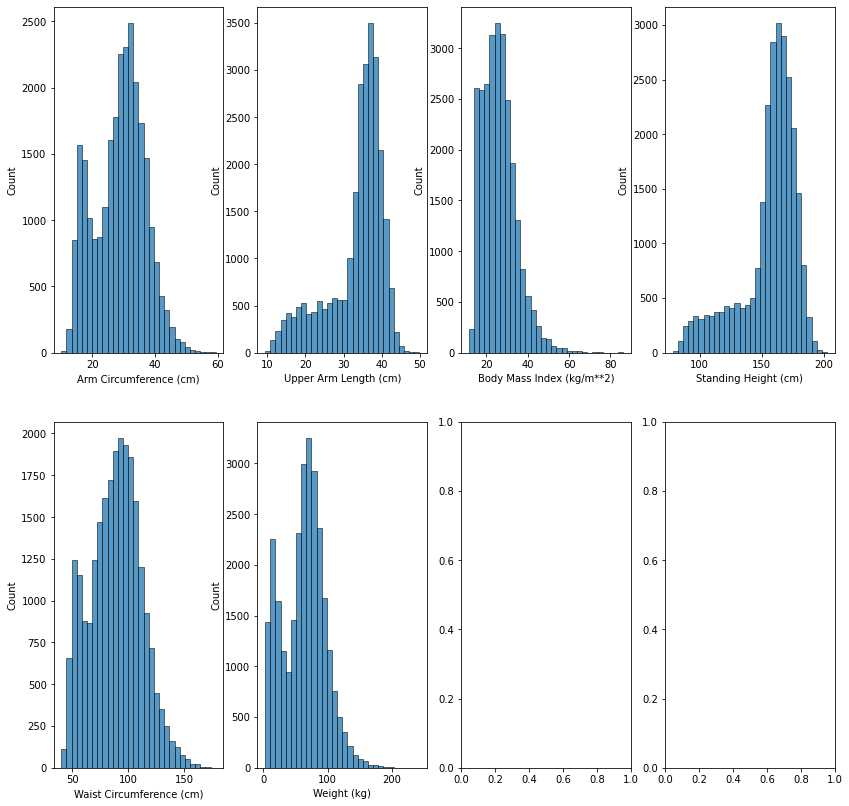

In [9]:
fig1 = vi.multi_axes_plotter(bmx, 4, "stripplot", (14, 14), variable_names)

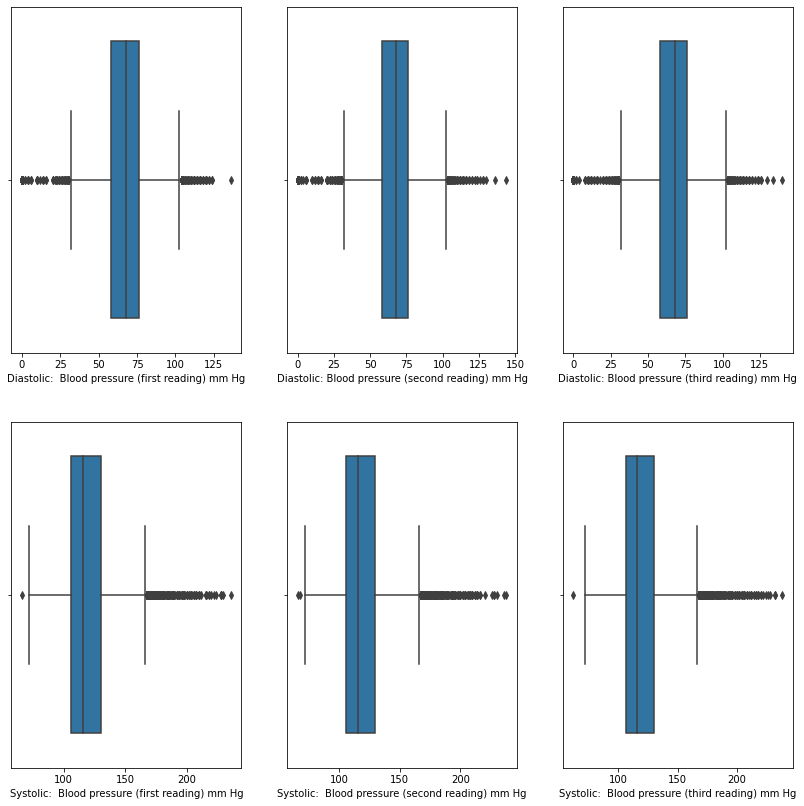

In [13]:
fig2 = vi.multi_axes_plotter(bpx, 3, "box", (14, 14), variable_names)

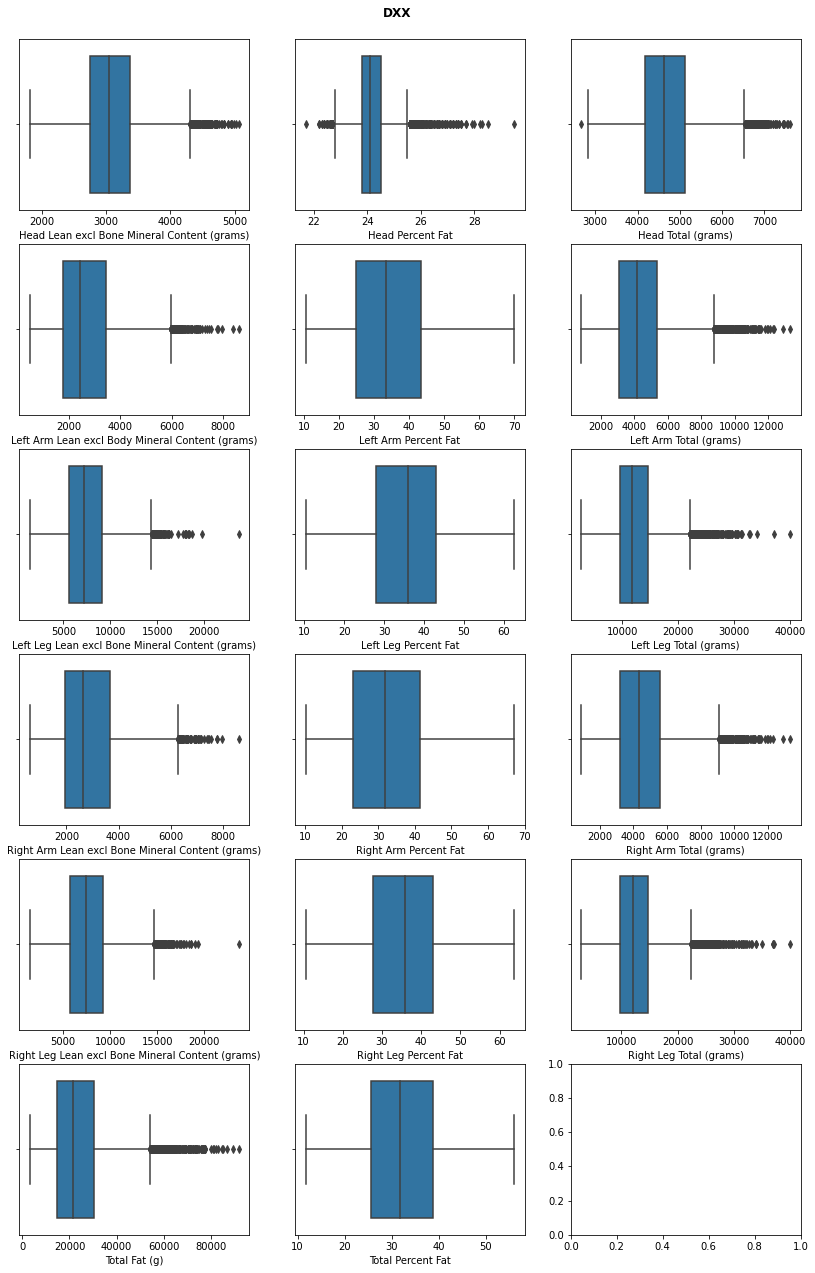

In [25]:
fig3 = vi.multi_axes_plotter(dxx, 3, "box", (14, 22), variable_names)
fig3.suptitle("DXX", y = .9, fontweight = "bold")
plt.show()

In [16]:
bmx.describe()

,BMXARMC,BMXARML,BMXBMI,BMXHT,BMXLEG,BMXWAIST,BMXWT
count,26450.000000,26454.000000,25816.000000,25852.000000,21215.000000,24575.000000,27748.000000
mean,28.713622,33.260377,26.071878,155.831415,38.435828,88.345563,63.339152
std,7.985997,7.356196,8.062106,22.843119,4.129029,22.744400,32.537779
min,10.100000,9.400000,11.500000,78.300000,24.000000,40.000000,3.100000
25%,23.000000,30.900000,20.000000,149.900000,35.700000,72.100000,39.100000
50%,29.600000,35.500000,25.300000,161.700000,38.500000,89.300000,66.200000
75%,34.300000,38.200000,30.700000,170.900000,41.200000,103.900000,84.300000
max,59.400000,49.900000,86.200000,202.700000,55.000000,177.900000,242.600000


In [17]:
bpx.describe()

,BPXDI1,BPXDI2,BPXDI3,BPXSY1,BPXSY2,BPXSY3
count,20619.000000,21285.000000,21222.000000,20619.000000,21285.000000,21222.000000
mean,66.547068,66.463425,66.362925,119.941025,119.990792,119.665347
std,15.203800,15.455176,15.745431,18.910473,19.114958,18.899105
min,0.000000,0.000000,0.000000,66.000000,66.000000,62.000000
25%,58.000000,58.000000,58.000000,106.000000,106.000000,106.000000
50%,68.000000,68.000000,68.000000,116.000000,116.000000,116.000000
75%,76.000000,76.000000,76.000000,130.000000,130.000000,130.000000
max,136.000000,144.000000,140.000000,236.000000,238.000000,238.000000
